### seaborn - matplotlib 을 기반으로 하는 시각화 라이브러리 
- 시각적으로 뛰어남
- 간결한 구문 제공
- 판다스 데이터프레임에 최적화
- 데이터프레임을 집계해서 쉽게 차트로 요약할 수 있음

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font',family="Malgun Gothic") # 한글 타이틀

iris=sns.load_dataset("iris")
titanic=sns.load_dataset("titanic")
tips=sns.load_dataset("tips")
flights=sns.load_dataset("flights")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Text(0.5, 0, '요일')

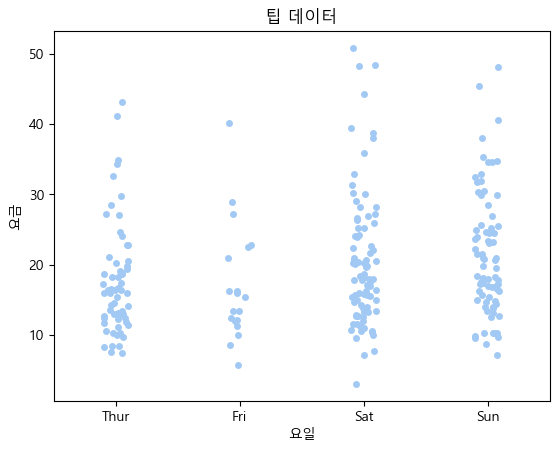

In [14]:
# 기본 배경 설정
sns.set_palette("pastel")

# 시각화
sns.stripplot(x="day",y="total_bill",data=tips)

# 개인화
plt.title('팁 데이터')
plt.ylabel('요금')
plt.xlabel('요일')

### seaborn 막대그래프
- seaborn 에서 사용하는 막대그래프는 파라미터 3개로 범주별 그룹까지 쉽게 표현 가능
- 오차 막대 표시(부트스트랩 신뢰구간): 이 데이터를 기반으로 유사한 상황의 95%가 해당 범위 내에서 결과를 얻을 것이라는 의미
- estimator 를 이용해 편하게 집계 가능

<AxesSubplot: xlabel='sex', ylabel='tip'>

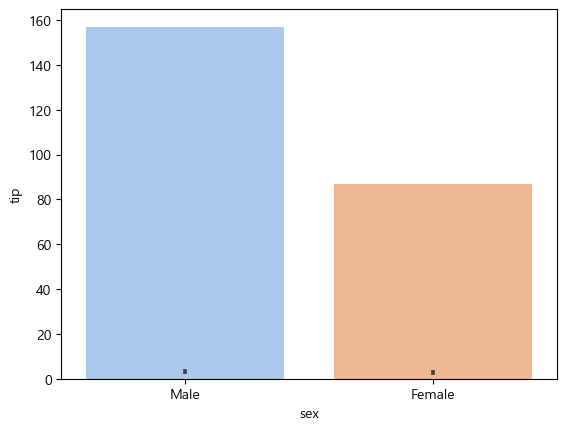

In [18]:
# 평균치 빠르게 집계해서 시각화하기 -> 이게 평균치인가..?
sns.barplot(x="sex",y="tip",data=tips)

# estimator 지정: list에 해당하는 함수 사용 가능
sns.barplot(x="sex",y="tip",estimator=len, data=tips)

<AxesSubplot: xlabel='sex', ylabel='tip'>

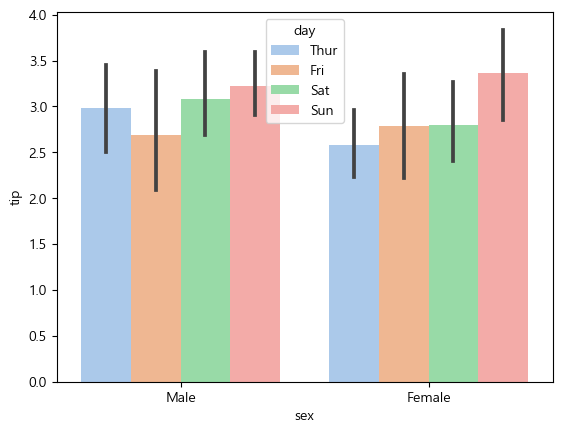

In [19]:
# 여러 열에서 집단별로 그룹핑, 세부 집단 시각화
## hue 파라미터 추가

sns.barplot(x="sex",y="tip",hue="day",data=tips)  # 왕 편리!!

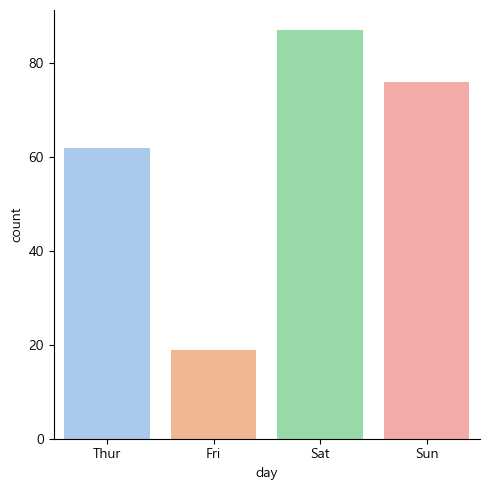

In [28]:
# 요일별 팁 카운트 / 단일 변수 -> catplot
sns.catplot(x='day',kind='count',data=tips) 

### seaborn 박스플롯
- 시각적으로 데이터 분포를 표현하기 위한 탐색적 그래프

<AxesSubplot: xlabel='smoker', ylabel='tip'>

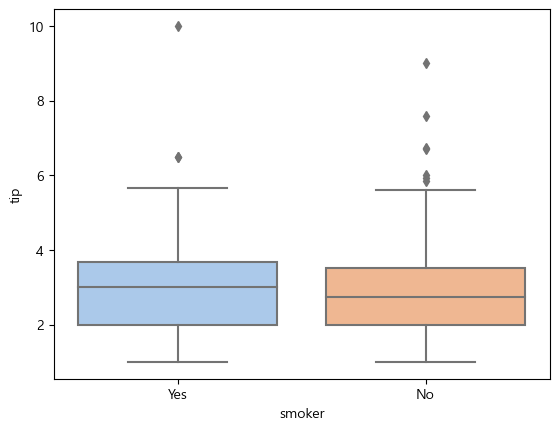

In [30]:
sns.boxplot(x="smoker",y="tip",data=tips)

<AxesSubplot: >

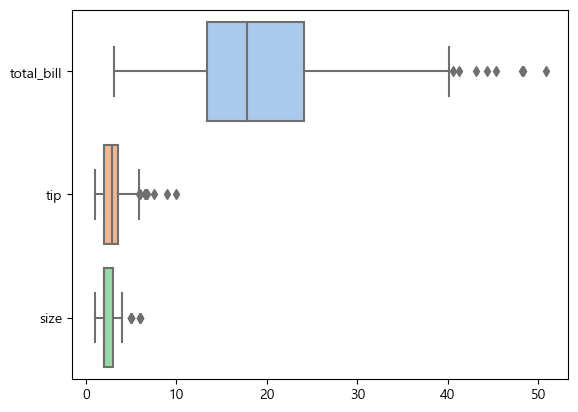

In [31]:
sns.boxplot(data=tips,orient="h")  # 이건 뭐지..?

### 박스플롯으로 이상치 탐지 후 제거 -> 시각화

<AxesSubplot: >

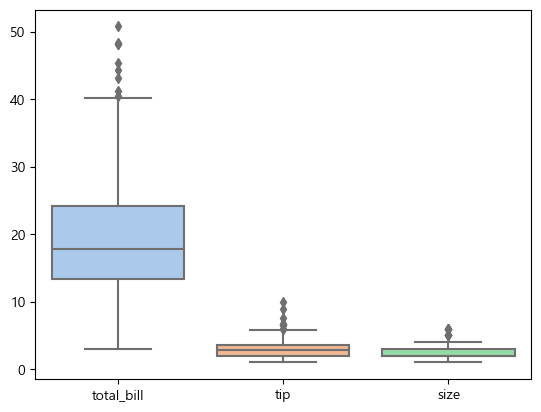

In [33]:
sns.boxplot(data=tips)  # total_bill 에서 40 이상 / tips 에서 8 이상은 이상치라는 것을 알 수 있음

In [34]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [36]:
# 조건에 맞은 데이터 10행 삭제 -> 새로운 변수 newtips 구성
newtips=tips[(tips.total_bill<40) & (tips.tip<8)]
newtips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot: >

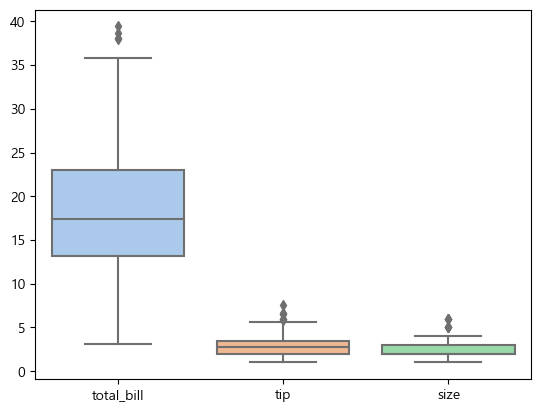

In [37]:
# 이상치 조정 후 시각화 결과
sns.boxplot(newtips)  # 여전히 이상치가 남아있는데, 또 제거할 필요는 없는 것인가? 이상치를 완벽하게 없앨 수는 없는 것인가?